# Настройка pandas

In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# Задаем некоторые опции библиотеки pandas, которые 
# настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

# Объект Series

In [2]:
# создаем объект Series, состоящий
# из четырех элементов
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
# получаем значение для метки индекса 1
s[1]

2

In [4]:
# возвращаем серию с элементами,
# у которых метки 1 и 3
s[[1, 3]]

1    2
3    4
dtype: int64

In [5]:
# создаем серию, задав индекс в явном виде
s = pd.Series([1, 2, 3, 4], 
               index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [6]:
# ищем элементы серии, у которых
# метки индекса 'a' и 'd'
s[['a', 'd']]

a    1
d    4
dtype: int64

In [7]:
# передаем список целочисленных значений в объект Series,
# у которого метки индекса записаны в виде букв,
# поиск буквенных меток будет осуществлен на основе
# числового индекса, начинающегося с 0,
# как если бы мы использовали обычный массив
s[[1, 2]]

b    2
c    3
dtype: int64

In [8]:
# извлекаем только индекс объекта Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
# создаем объект Series, индекс которого - серия дат
# между двумя определенными датами (включительно)
dates = pd.date_range('2016-04-01', '2016-04-06')
dates

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# создаем объект Series, в котором значениям температуры
# будут соответствовать даты в индексе
temps1 = pd.Series([80, 82, 85, 90, 83, 87], 
                   index = dates)
temps1

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, dtype: int64

In [11]:
# какая температура была 2016-04-04?
temps1['2016-04-04']

90

In [12]:
# создаем вторую серию значений, используя
# тот же самый индекс
temps2 = pd.Series([70, 75, 69, 83, 79, 77], 
                   index = dates)
# следующий программный код выравнивает
# обе серии по меткам индекса и вычисляет
# разницу температур в этих метках
temp_diffs = temps1 - temps2
temp_diffs

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [13]:
# вычислим разницу температур для определенной числовой 
# метки индекса, как если бы серия была массивом
temp_diffs[2]

16

In [14]:
# вычисляем среднее значение разности температур
temp_diffs.mean()

9.0

# Объект DataFrame

In [15]:
# создаем объект DataFrame с двумя сериями temp1 и temp2
# и присваиваем им имена столбцов
temps_df = pd.DataFrame(
            {'Missoula': temps1, 
             'Philadelphia': temps2})
temps_df

            Missoula  Philadelphia
2016-04-01        80            70
2016-04-02        82            75
2016-04-03        85            69
2016-04-04        90            83
2016-04-05        83            79
2016-04-06        87            77

In [16]:
# получаем столбец Missoula
temps_df['Missoula']

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [17]:
# аналогичным образом мы можем получить
# столбец Philadelphia
temps_df['Philadelphia']

2016-04-01    70
2016-04-02    75
2016-04-03    69
2016-04-04    83
2016-04-05    79
2016-04-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [18]:
# выводим оба столбца
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2016-04-01            70        80
2016-04-02            75        82
2016-04-03            69        85
2016-04-04            83        90
2016-04-05            79        83
2016-04-06            77        87

In [19]:
# извлекаем столбец Missoula с помощью 
# "вычисляемого" свойства
temps_df.Missoula

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [20]:
# вычисляем разницу температур двух городов
temps_df.Missoula - temps_df.Philadelphia

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [21]:
# добавляем в датафрейм temp_df столбец Difference,
# который содержит разности температур
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2016-04-01        80            70          10
2016-04-02        82            75           7
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

In [22]:
# получаем имена столбцов, которые
# к тому же являются объектом Index
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [23]:
# отбираем значения разностей температур в столбце Difference, начиная 
# с позиции 1 (2016-04-02) и заканчивая позицией 4 (2016-04-05), 
# как если бы это был массив
# обратите внимание, что конец диапазона не включается, то есть
# диапазон не включает элемент с позицией 4 (2016-04-05)
temps_df.Difference[1:4]

2016-04-02     7
2016-04-03    16
2016-04-04     7
Freq: D, Name: Difference, dtype: int64

In [24]:
# получаем строку, которой соответствует
# метка индекса 1
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2016-04-02 00:00:00, dtype: int64

In [25]:
# имена столбцов стали индексом,
# мы "повернули" их
temps_df.iloc[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [26]:
# извлекаем строку с помощью метки индекса,
# воспользовавшись свойством .loc
temps_df.loc['2016-04-05']

Missoula        83
Philadelphia    79
Difference       4
Name: 2016-04-05 00:00:00, dtype: int64

In [27]:
# получаем значения столбца Difference в строках 1, 3 и 5,
# используя целочисленные позиции с началом отсчета в 0
temps_df.iloc[[1, 3, 5]].Difference

2016-04-02     7
2016-04-04     7
2016-04-06    10
Freq: 2D, Name: Difference, dtype: int64

In [28]:
# какие значения в столбце Missoula > 82?
temps_df.Missoula > 82

2016-04-01    False
2016-04-02    False
2016-04-03     True
2016-04-04     True
2016-04-05     True
2016-04-06     True
Freq: D, Name: Missoula, dtype: bool

In [29]:
# возвращаем строки, в которых значения температуры 
# для столбца Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

# Загрузка данных из CSV-файла в объект DataFrame

In [30]:
# считываем содержимое файла в объект DataFrame
df = pd.read_csv('Data/goog.csv')
df

          Date        Open        High         Low       Close   Volume
0   12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1   12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2   12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3   12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4   12/23/2016  790.900024  792.739990  787.280029  789.909973   623400
..         ...         ...         ...         ...         ...      ...
56   3/13/2017  844.000000  848.684998  843.250000  845.539978  1149500
57   3/14/2017  843.640015  847.239990  840.799988  845.619995   779900
58   3/15/2017  847.590027  848.630005  840.770020  847.200012  1379600
59   3/16/2017  849.030029  850.849976  846.130005  848.780029   970400
60   3/17/2017  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [31]:
# выводим содержимое столбца с датами
df.Date

0     12/19/2016
1     12/20/2016
2     12/21/2016
3     12/22/2016
4     12/23/2016
         ...    
56     3/13/2017
57     3/14/2017
58     3/15/2017
59     3/16/2017
60     3/17/2017
Name: Date, Length: 61, dtype: object

In [32]:
# мы можем получить первое значение
# в столбце с датами
df.Date[0]

'12/19/2016'

In [33]:
# оно является строкой
type(df.Date[0])

str

In [34]:
# считываем данные и указываем библиотеке pandas, 
# что в итоговом датафрейме значения столбца
# с датами должны быть фактическими датами
df = pd.read_csv('Data/goog.csv', parse_dates=['Date'])
df

         Date        Open        High         Low       Close   Volume
0  2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
1  2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2  2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
3  2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
4  2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
..        ...         ...         ...         ...         ...      ...
56 2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
57 2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
58 2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
59 2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
60 2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [35]:
# проверяем, являются ли сейчас значения столбца
# Date датами, то есть фактически им присвоен
# тип Timestamp
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
# к сожалению, индекс использует числовые значения,
# что затрудняет вывод данных по дате
df.index

RangeIndex(start=0, stop=61, step=1)

In [37]:
# считываем данные снова, теперь задаем столбец с датами 
# в качестве индекса датафрейма
df = pd.read_csv('Data/goog.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')
df

                  Open        High         Low       Close   Volume
Date                                                               
2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
...                ...         ...         ...         ...      ...
2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 5 columns]

In [38]:
# и теперь индекс - это DatetimeIndex
df.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
      

# Визуализация

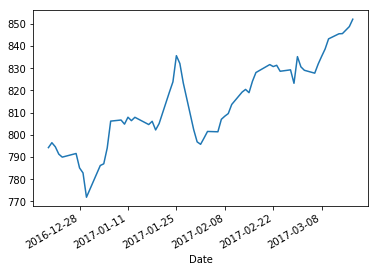

In [39]:
# на основе значений столбца Close строим график
df.Close.plot();